# Word embedding visualization
Using Stanford GloVe pretrained embedding and PCA to visualization embedded words in 3D space

In [2]:
from pymagnitude import *
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# load pretrained embedding
EMBEDDING_PATH = "/Users/zetong/glove.840B.300d.magnitude"
vectors = Magnitude(EMBEDDING_PATH)

In [3]:
# words for embedding
words = ["tiger", "cat", "cougar", "lion", "dog", "bike", "car", "motorcycle", "beer", "cake", "taco",
"pancake", "fridge", "apple", "icecream", "motorbike", "truck", "train", "plane", "phone", "laptop", "computer", "playstation"]

In [5]:
# PCA and 3D projection
X = vectors.query(words)
X_tilde = X - X.mean(axis=0)
S = np.matmul(np.transpose(X_tilde), X_tilde) / X.shape[0]
eigVal, eigVec = np.linalg.eig(S)

idx = eigVal.argsort()[::-1]
sorted_eigVal = eigVal[idx]
sorted_eigVec = eigVec[:, idx]

proj_mat = sorted_eigVec[:, 0:3]
X_proj = np.matmul(X, proj_mat)

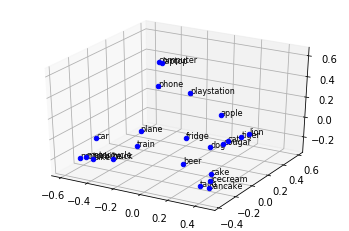

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(len(words)):
 ax.scatter(X_proj[i,0],X_proj[i,1],X_proj[i,2],color='b') 
 ax.text(X_proj[i,0],X_proj[i,1],X_proj[i,2], (words[i]), size=8, zorder=1, color='k') 
plt.show()